<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>

<h1><font color="#004D7F" size=5>1. Redes Neuronales </font></h1>

<h1><font color="#004D7F" size=5>2. Tensorflow  </font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

En esta ocasión te traemos el ejemplo más, pero más básico que te puedes encontrar, donde con datos x,y (minutos vs carga de batería de un celular) hacemos una regresión lineal simple utilizando Google Colab. Utilizamos tres capas ocultas para la red neuronal,además que hacemos la gráfica de las predicciones vs los valores reales, y una predicción para un valor. Este ejemplo te podría ser de utilidad para adaptarlo a tus datos.

In [1]:
import pandas as pd
df=pd.read_csv('datosbateria.csv')
print(df.head(7))
print(df.columns)

   minutos  bateria
0        0        5
1        4       10
2        8       14
3       12       19
4       16       24
5       20       28
6       24       33
Index(['minutos', 'bateria'], dtype='object')


In [2]:
x=df['minutos']
y=df['bateria']

In [3]:
!pip install keras

In [4]:
!pip install tensorflow

In [5]:
import keras
import keras.backend as kb
import tensorflow as tf

In [6]:
model = keras.Sequential([
   keras.layers.Dense(7, activation=tf.nn.relu, input_shape=[1]), # usamos una columna podemos usar mas columnas
   keras.layers.Dense(7, activation=tf.nn.relu),
   keras.layers.Dense(3, activation=tf.nn.relu),
   keras.layers.Dense(1)
])
#modelo de red tenemos 3 capas ocultas 7,7,3
#pidemos cambiarloa a 32 o 64 que tambien es comun
#

In [7]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01) #RMSprop es el otimizador hay otro que se llama Adan
# la razon de aprendizaje es 0.01
# por ejemplo queremos reducir el erro a 0.001 tal vez necesitemos aumentar lo epocs para poder tener un resultado adeucado
# tambien podmeos modificar el numero de neuronas

In [8]:
model.compile(loss='mean_squared_error', # promedio del cuadrado del error
              optimizer=optimizer,
              metrics=['mean_absolute_error','mean_squared_error'] #metricas evaluamos que tambien se comporta el modelo
              )

In [9]:
model.fit(x,y, epochs=100) #Ejecutamos las epocas

Epoch 1/100
1/1 [==============================] - 1s 840ms/step - loss: 1330.9607 - mean_absolute_error: 32.2849 - mean_squared_error: 1330.9607
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1227.6361 - mean_absolute_error: 31.0249 - mean_squared_error: 1227.6361
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 1135.9153 - mean_absolute_error: 29.8604 - mean_squared_error: 1135.9153
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 1040.2832 - mean_absolute_error: 28.6006 - mean_squared_error: 1040.2832
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 942.6064 - mean_absolute_error: 27.2544 - mean_squared_error: 942.6064
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 842.5316 - mean_absolute_error: 25.8022 - mean_squared_error: 842.5316
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 741.4153 - mean_absolute_error: 24.2455 - mean_squared_error: 741.4153


In [10]:
model.predict([48]) # si queremos predecir solo un valor usamos esta linea

1/1 [==============================] - 0s 121ms/step


array([[59.290367]], dtype=float32)

1/1 [==============================] - 0s 150ms/step


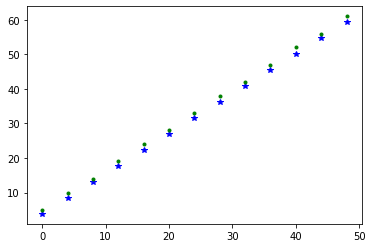

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b*', x,y, 'g.')